In [18]:
import pandas as pd
import semopy as sm
import seaborn as sns
import matplotlib.pylab as plt

In [19]:
lat_lon_list = [(45, 0), (42, 13), (68,25)]

df1 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.csv", index_col = 0)
df2 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.csv", index_col = 0)
df3 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.csv", index_col = 0)


In [20]:
# sns.pairplot(df1)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.png")

In [21]:
# sns.pairplot(df2)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [22]:
# sns.pairplot(df3)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.png")

# What we are interested in?
# This is to test semopy, we will go to more detailed graphs in later part

srrad_spring, tp_spring, temp_spring -> lai_spring
srrad_summer, tp_summer, temp_summer -> lai_summer

lai_spring -> lai_summer

In [63]:
mod_0 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer
lai_summer ~ lai_spring

"""

mod_1 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring

"""

mod_2 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring + swvlall_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
swvlall_spring ~ lai_winter + ssrd_spring + temp_spring+ tp_spring
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring
lai_spring ~ lai_winter

"""

mod = mod_2
model = sm.Model(mod_2)
sm.semplot(model, f"images/sem_0.png")
model = sm.Model(mod)

In [64]:
df = df2

df=(df-df.mean())/df.std()
model.fit(df)

SolverResult(fun=2.0975508751330034, success=True, n_it=19, x=array([ 0.18827797,  0.46857262,  0.44596173,  0.00233737,  0.17526333,
       -0.18546113,  0.19863954, -0.57836008,  0.27389812, -0.16489399,
        0.16769503, -0.22409867,  0.60193785, -0.01188957, -0.71773977,
       -0.11753515, -0.44635532, -0.07953973,  0.50535002,  0.72776015,
        0.63827311,  0.53252088]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

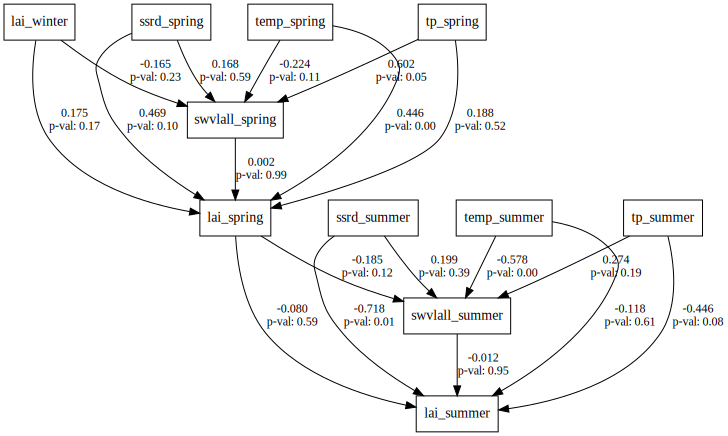

In [65]:
sm.semplot(model, f"images/sem_fit_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [66]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,lai_spring,~,tp_spring,0.188278,0.289304,0.650796,0.515178
1,lai_spring,~,ssrd_spring,0.468573,0.286147,1.637522,0.101521
2,lai_spring,~,temp_spring,0.445962,0.131487,3.391668,0.000695
3,lai_spring,~,swvlall_spring,0.002337,0.148174,0.015774,0.987414
4,lai_spring,~,lai_winter,0.175263,0.128021,1.369021,0.170993
5,swvlall_summer,~,lai_spring,-0.185461,0.120638,-1.537339,0.124210
6,swvlall_summer,~,ssrd_summer,0.198640,0.230170,0.863011,0.388131
7,swvlall_summer,~,temp_summer,-0.578360,0.168428,-3.433868,0.000595
8,swvlall_summer,~,tp_summer,0.273898,0.207721,1.318585,0.187308
9,swvlall_spring,~,lai_winter,-0.164894,0.137581,-1.198522,0.230714


In [12]:
df_pred = df.copy()
df_pred["lai_summer"] = float('nan')

pred_lai_summer = model.predict(df_pred).lai_summer


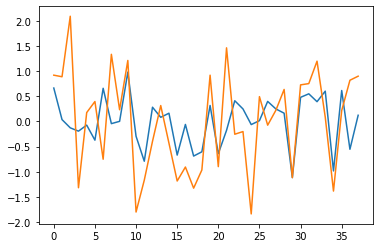

In [13]:
plt.plot(pred_lai_summer.values)
plt.plot(df.lai_summer.values)
